## Olympic DataSet

### Introduction

This dataset is a list of all the medal winners in the  Olympics from 2000 to 2012. 
It's a basic data set with athelete  information and winning medal details.

##### Input Variables

    name: name of the player
    age: age of the player
    country: country name which player is reprsenting
    year: year of attending gane
    Date_Given: sports winning date
    sports: sport name
    gold_medal: no of gold medal win
    silver_medal: no of silver medal win
    brone_medal: no of bronze medal win
    total_medal: no of total medal win



##### Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import missingno as msno
import warnings 
warnings.filterwarnings('ignore')

###### Loading Dataset

In [53]:
#df = pd.read_csv('F://somya//python_code//capstone project//olympix_data_organized_with_header (1).csv')
df = pd.read_csv('/content/olympix_data_organized_with_header (1).csv')

In [55]:
df.shape # Checking no of observations and column

(8618, 10)

In [56]:
df.head(5) # first 5 rows of dataframe to review the dataset

,name,age,country,year,Date_Given,sports,gold_medal,silver_medal,brone_medal,total_medal
0,Michael Phelps,23.0,United States,2008,2008-08-24,Swimming,8,0,0,8
1,Michael Phelps,19.0,United States,2004,2004-08-29,Swimming,6,0,2,8
2,Michael Phelps,27.0,United States,2012,2012-12-08,Swimming,4,2,0,6
3,Natalie Coughlin,25.0,United States,2008,2008-08-24,Swimming,1,2,3,6
4,Aleksey Nemov,24.0,Russia,2000,2000-01-10,Gymnastics,2,1,3,6


In [57]:
df.tail() # last 5 rows of data frome to review the dataset

,name,age,country,year,Date_Given,sports,gold_medal,silver_medal,brone_medal,total_medal
8613,Olena Sadovnycha,32.0,Ukraine,2000,2000-01-10,Archery,0,1,0,1
8614,Kateryna Serdiuk,17.0,Ukraine,2000,2000-01-10,Archery,0,1,0,1
8615,Wietse van Alten,21.0,Netherlands,2000,2000-01-10,Archery,0,0,1,1
8616,Sandra Wagner-Sachse,31.0,Germany,2000,2000-01-10,Archery,0,0,1,1
8617,Rod White,23.0,United States,2000,2000-01-10,Archery,0,0,1,1


In [58]:
df.nunique() # unique values in each columns

name            6955
age               42
country          110
year               7
Date_Given         7
sports            49
gold_medal         7
silver_medal       4
brone_medal        4
total_medal        7
dtype: int64

##### Deal with missing values appropriately. You can either remove them or fill them, but a proper justification is required.

In [59]:
df.isnull().sum() # checking sum of the missing values

name            5
age             5
country         0
year            0
Date_Given      0
sports          0
gold_medal      0
silver_medal    0
brone_medal     0
total_medal     0
dtype: int64

total 5 values are missing

In [60]:
df.isnull().mean()*100 # missingvalues percentage

name            0.058018
age             0.058018
country         0.000000
year            0.000000
Date_Given      0.000000
sports          0.000000
gold_medal      0.000000
silver_medal    0.000000
brone_medal     0.000000
total_medal     0.000000
dtype: float64

percentage of missing values is .05 in the columns of name and age


In [61]:
df[df.name.isnull()==True] # there is 5 values missing in name and check

,name,age,country,year,Date_Given,sports,gold_medal,silver_medal,brone_medal,total_medal
1428,NaN,NaN,Brazil,2012,2012-12-08,Volleyball,0,1,0,1
1429,NaN,NaN,Brazil,2012,2012-12-08,Volleyball,0,1,0,1
1430,NaN,NaN,Brazil,2012,2012-12-08,Volleyball,0,1,0,1
4485,NaN,NaN,Argentina,2012,2012-12-08,Hockey,0,1,0,1
4486,NaN,NaN,Argentina,2012,2012-12-08,Hockey,0,1,0,1


In [62]:
# if the number of missing values would high then i will go with the imputations techniques but for now i will drop the rows.
df.drop(labels=df[df.name.isnull()==True].index,axis=0,inplace=True)

In [63]:
# cross checking the null values 
df.isnull().sum()

name            0
age             0
country         0
year            0
Date_Given      0
sports          0
gold_medal      0
silver_medal    0
brone_medal     0
total_medal     0
dtype: int64

there is no missing values left .

##### Duplicates in the dataset introduces bias in the study. Please check and perform appropriate steps.

In [64]:
df.shape # no of observations and featurs after removing the missing values

(8613, 10)

In [65]:
#droping duplicates if any available
df=df.drop_duplicates(subset=None, keep='first', inplace=False)

In [66]:
df.shape  # checking obbservations and features after droping duplicates

(8613, 10)

##### Please remove special characters from the name column.

In [67]:
#removing special character with the help of the regex
import re # importing regex library for removing special characters
def strip_character(dataCol): # defining a function for cleaning special charcter in name column
    r = re.compile(r'[^a-zA-Z !@#$%&*_+-=|\:";<>,./()[\]{}\']')   # the charcters which need to check 
    return r.sub('', dataCol) #replacing special character with blank 

df['name'] = df['name'].apply(strip_character) # applying the our replacing special character functoion on on cilumn

In [68]:
df.head() # first 5 rows after removing special characters
 

,name,age,country,year,Date_Given,sports,gold_medal,silver_medal,brone_medal,total_medal
0,Michael Phelps,23.0,United States,2008,2008-08-24,Swimming,8,0,0,8
1,Michael Phelps,19.0,United States,2004,2004-08-29,Swimming,6,0,2,8
2,Michael Phelps,27.0,United States,2012,2012-12-08,Swimming,4,2,0,6
3,Natalie Coughlin,25.0,United States,2008,2008-08-24,Swimming,1,2,3,6
4,Aleksey Nemov,24.0,Russia,2000,2000-01-10,Gymnastics,2,1,3,6


In [69]:
df.info() # dataset information and datatype

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8613 entries, 0 to 8617
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          8613 non-null   object 
 1   age           8613 non-null   float64
 2   country       8613 non-null   object 
 3   year          8613 non-null   int64  
 4   Date_Given    8613 non-null   object 
 5   sports        8613 non-null   object 
 6   gold_medal    8613 non-null   int64  
 7   silver_medal  8613 non-null   int64  
 8   brone_medal   8613 non-null   int64  
 9   total_medal   8613 non-null   int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 740.2+ KB


In [70]:
df=df.astype({'name':'category','age':'int','country':'category', 'sports':'category'})
#converting name, country ,sports into category data type, age into int  

In [71]:
df.info() # checking details aftre changing datatype

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8613 entries, 0 to 8617
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   name          8613 non-null   category
 1   age           8613 non-null   int64   
 2   country       8613 non-null   category
 3   year          8613 non-null   int64   
 4   Date_Given    8613 non-null   object  
 5   sports        8613 non-null   category
 6   gold_medal    8613 non-null   int64   
 7   silver_medal  8613 non-null   int64   
 8   brone_medal   8613 non-null   int64   
 9   total_medal   8613 non-null   int64   
dtypes: category(3), int64(6), object(1)
memory usage: 890.7+ KB


In [72]:
df.describe(include='all') # all 5 points decription of data set

,name,age,country,year,Date_Given,sports,gold_medal,silver_medal,brone_medal,total_medal
count,8613,8613.000000,8613,8613.000000,8613,8613,8613.000000,8613.000000,8613.000000,8613.000000
unique,6955,NaN,110,NaN,7,49,NaN,NaN,NaN,NaN
top,Wang Hao,NaN,United States,NaN,2008-08-24,Athletics,NaN,NaN,NaN,NaN
freq,4,NaN,1109,NaN,1872,687,NaN,NaN,NaN,NaN
mean,NaN,26.405434,NaN,2005.975386,NaN,NaN,0.364914,0.362940,0.377917,1.105770
std,NaN,5.102118,NaN,4.288737,NaN,NaN,0.545436,0.511531,0.505069,0.409003
min,NaN,15.000000,NaN,2000.000000,NaN,NaN,0.000000,0.000000,0.000000,1.000000
25%,NaN,23.000000,NaN,2002.000000,NaN,NaN,0.000000,0.000000,0.000000,1.000000
50%,NaN,26.000000,NaN,2006.000000,NaN,NaN,0.000000,0.000000,0.000000,1.000000
75%,NaN,29.000000,NaN,2010.000000,NaN,NaN,1.000000,1.000000,1.000000,1.000000


In [73]:
# dividing columns on the basis of datatype
col_num=df.select_dtypes(include='number').columns
col_cat=df.select_dtypes(include='category').columns

##### Perform data visualization techniques to appropriate columns and explain them.  

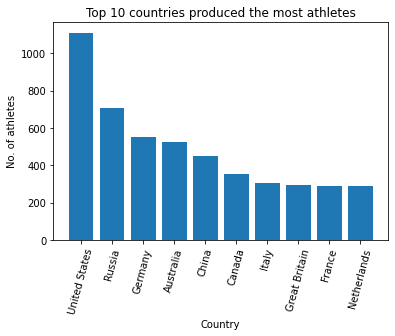

In [74]:
# the top 10 conturies which produced more athletes

#grouping the dataframe with country and counting the name column.
#sorted the value  and showed top 10 records
athletes_each_country = df.groupby('country')['name'].count().reset_index().sort_values("name", ascending=False).head(10)


# show the bar graph
plt.bar(athletes_each_country.country, athletes_each_country.name) 
plt.xlabel('Country')
plt.ylabel('No. of athletes')
plt.xticks(rotation=75)
plt.title('Top 10 countries produced the most athletes');

        Infrence: USA send most athletes in olympics 

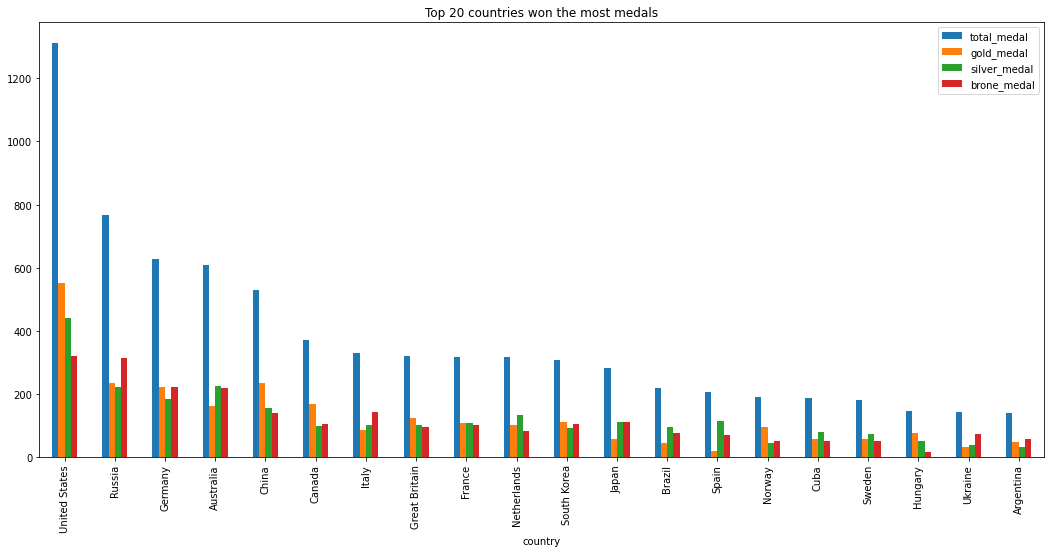

In [75]:
# top 20 countries won the medals

#grouping the dataframe by country and showing the sum of the total_medal,gold_medal,silver and broze columns.
medals_by_country1=df.groupby('country')['total_medal','gold_medal','silver_medal','brone_medal'].sum().sort_values(by='total_medal',ascending=False)[:20]

# visualizing the dataset using bar plot.
medals_by_country1.plot(kind='bar', figsize=(18,8),title='Top 20 countries won the most medals');


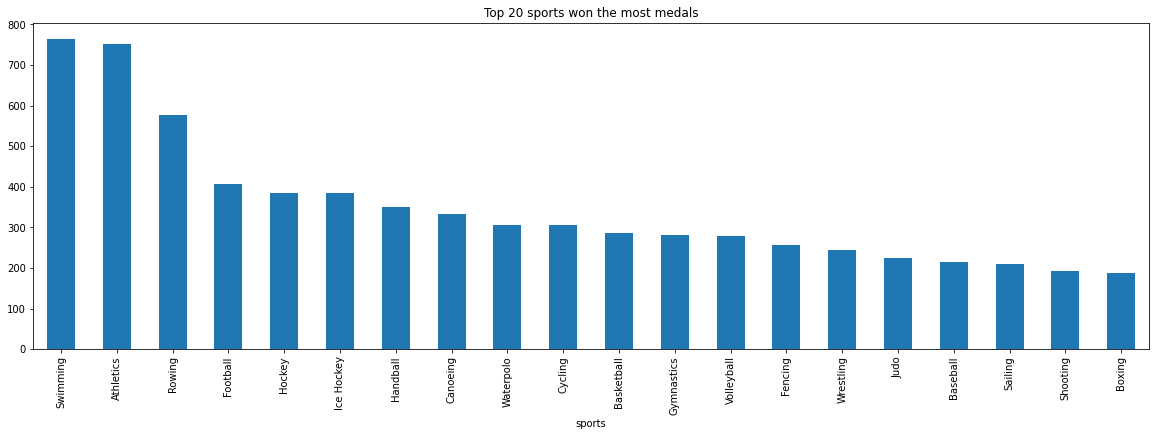

In [76]:
# top sports in which medals got won

# grouping the dataframe using sports and calculating sum of the total_medal column 
medals_in_sports=df.groupby('sports')['total_medal'].sum().sort_values(ascending=False).head(20)

# visualizing the result set using bar plot
medals_in_sports.plot(kind='bar', figsize=(20,6),title='Top 20 sports won the most medals')


##### Please check if the age dataset is skewed or symmetric. Based on results perform transformation.

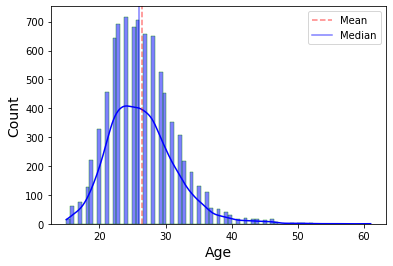

In [77]:
# for checking the skewness with visualization i am using histogram plot with kde, where i can easily see the distribution

# i am checking the distribution for feature age with kde  

sns.histplot(x=df['age'],kde=True, color='b', edgecolor='green',)
plt.axvline(x=df['age'].mean(),ls='--',color='red',alpha=0.5,Label='Mean')
plt.axvline(x=df['age'].median(),color='blue',alpha=0.5,label='Median') 
plt.xlabel( 'Age', fontsize=14)
plt.ylabel('Count', fontsize=14) 
plt.legend()
plt.show()

Infrence: the distribution seems right skewed.

In [78]:
#checking the skewness for numerical fearures in numbers
df.skew(numeric_only=True).sort_values()

year           -0.001129
brone_medal     0.762090
age             0.859007
silver_medal    0.955039
gold_medal      1.638839
total_medal     5.580939
dtype: float64

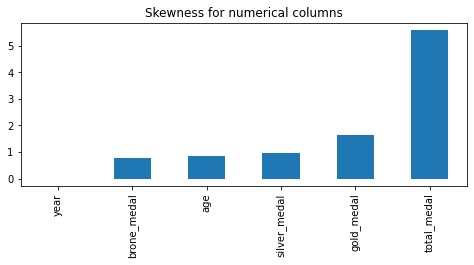

In [79]:
# plotting the features with skeness using bar plot.
df.skew(numeric_only=True).sort_values().plot(kind='bar',figsize=(8,3),title='Skewness for numerical columns')

 Infrence:
 
    fairly symmetrical	-0.5 & 0.5	            
    moderately skewed	-1.0 & -0.5 or 0.5 & 1	 
    highly skewed    	> -1 0r > 1	            
    
    for AGE feature skewness is 0.8 so its moderately skewed.
    feature is modetraly skewed so we are going to check the transformation using log and sqrt transformation.

skewness in age 
 before: 0.8590070668484233 
 after:  0.1548420625269884


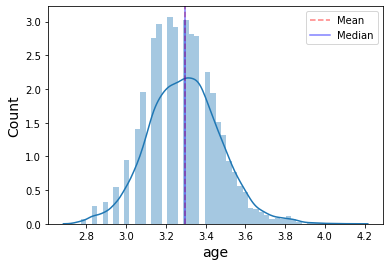

In [80]:
def log_transformation(column): # function for checking log transformation
    before =df[column].skew()
    after=np.log(df[column]).skew()
    print(f'skewness in {column} \n before: {before} \n after:  {after}')
    sns.distplot(np.log(df[column]+1))
    plt.axvline(x=np.log(df[column]+1).mean(),ls='--',color='red',alpha=0.5,Label='Mean')
    plt.axvline(x=np.log(df[column]+1).median(),color='blue',alpha=0.5,label='Median') 
    plt.xlabel( column, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.legend()
    plt.show() 
    
log_transformation('age')

        Infrence: Log transformation makes the distribution fairly symmetrical

skewness in age 
 before: 0.8590070668484233 
 after:  0.4898373817405729


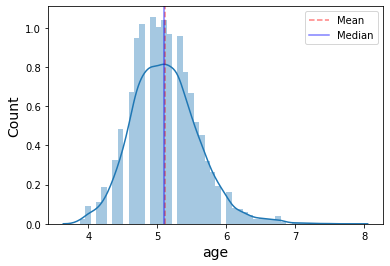

In [81]:
def sqrt_transformation(column): # function for checking log transformation
    before =df[column].skew()
    after=np.sqrt(df[column]).skew()
    print(f'skewness in {column} \n before: {before} \n after:  {after}')
    sns.distplot(np.sqrt(df[column]))
    plt.axvline(x=np.sqrt(df[column]).mean(),ls='--',color='red',alpha=0.5,Label='Mean')
    plt.axvline(x=np.sqrt(df[column]).median(),color='blue',alpha=0.5,label='Median') 
    plt.xlabel( column, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.legend()
    plt.show() 
    
sqrt_transformation('age')


        Infrence:   the age column is symmetric after using sqrt transformation too.
          

    Infrence:  As we can see after applying log,SQRT transformation age column becomes symmetrical.
               So for age column log transformation make the data more symmetry so log transformation is more appropriiate.

##### Please perform appropriate numerical measures on each column and report them accordingly.

In [83]:
#numerical measure for the category columns
df.describe(include='category')

,name,country,sports
count,8613,8613,8613
unique,6955,110,49
top,Wang Hao,United States,Athletics
freq,4,1109,687


In [84]:
#numerical measures for the numerical columns
df.describe(include='int') 

,age,year,gold_medal,silver_medal,brone_medal,total_medal
count,8613.000000,8613.000000,8613.000000,8613.000000,8613.000000,8613.000000
mean,26.405434,2005.975386,0.364914,0.362940,0.377917,1.105770
std,5.102118,4.288737,0.545436,0.511531,0.505069,0.409003
min,15.000000,2000.000000,0.000000,0.000000,0.000000,1.000000
25%,23.000000,2002.000000,0.000000,0.000000,0.000000,1.000000
50%,26.000000,2006.000000,0.000000,0.000000,0.000000,1.000000
75%,29.000000,2010.000000,1.000000,1.000000,1.000000,1.000000
max,61.000000,2012.000000,8.000000,3.000000,3.000000,8.000000


##### Please list the top 10 countries with the gold medal, then top10 countries with the silver medal, then bronze medal and the total medal.

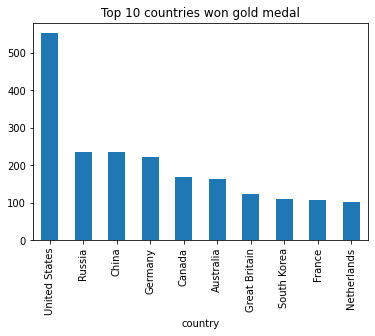

In [85]:
#top10 countries with the gold medal .

#grouping the dataset using country and calculating sum of the gold medals after sosting them into ascending order 
#visualizing the result using bar plot
df.groupby('country')['gold_medal'].sum().sort_values(ascending=False).head(10).plot(kind='bar',title='Top 10 countries won gold medal')

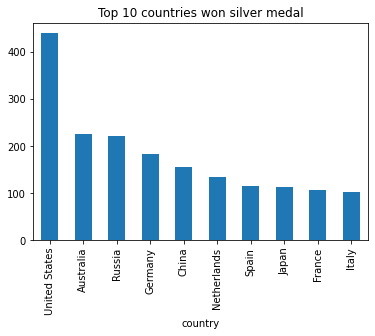

In [86]:
#top10 countries with the silver medal

#grouping the dataset using country and calculating sum of the silver medals after sosting them into ascending order 
#visualizing the result using bar plot
df.groupby('country')['silver_medal'].sum().sort_values(ascending=False).head(10).plot(kind='bar',title='Top 10 countries won silver medal') 

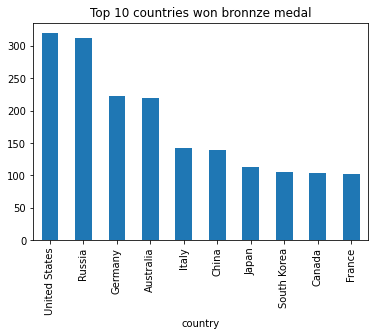

In [87]:
#top10 countries with bronze medal.

#grouping the dataset using country and calculating sum of the bronze medals after sosting them into ascending order 
#visualizing the result using bar plot
df.groupby('country')['brone_medal'].sum().sort_values(ascending=False).head(10).plot(kind='bar',title='Top 10 countries won bronnze medal') 

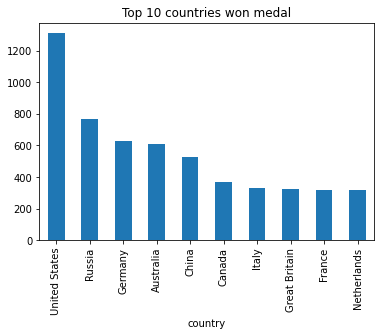

In [88]:
#top10 countries with the total medal.

#grouping the dataset using country and calculating sum of the total medals after sosting them into ascending order 
#visualizing the result using bar plot
df.groupby('country')['total_medal'].sum().sort_values(ascending=False).head(10).plot(kind='bar',title='Top 10 countries won medal') 

**PYSPARK **

In [41]:
pip install pyspark # installing pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.3 MB 40 kB/s 
     |████████████████████████████████| 199 kB 36.2 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764026 sha256=0d50a31eb9ca7c09319fb60d74ad1f7348c03bd5f3c4fa2a24885c5d3889a213
  Stored in directory: /root/.cache/pip/wheels/7a/8e/1b/f73a52650d2e5f337708d9f6a1750d451a7349a867f928b885
Successfully built pyspark


In [42]:
#importing libraries 

# libraries for creating pyspark session
from pyspark import SparkContext,SparkConf
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext

# libraries for SQL functions
from pyspark.sql import functions as f


### Write PySpark code to read olympix_data.csv file

In [43]:
# creatinng session 
conf=SparkConf().setAppName('olympic_conf')
sc=SparkContext(conf=conf)
spark=SparkSession.builder.appName('olympic_session').getOrCreate()
sqlcont=SQLContext(spark)

# reading panda datafram with pyspark 
sparkDF=spark.createDataFrame(df)


In [90]:
sparkDF.show(5) # first 5 frows dispalying 

+----------------+---+-------------+----+----------+----------+----------+------------+-----------+-----------+
|            name|age|      country|year|Date_Given|    sports|gold_medal|silver_medal|brone_medal|total_medal|
+----------------+---+-------------+----+----------+----------+----------+------------+-----------+-----------+
|  Michael Phelps| 23|United States|2008|2008-08-24|  Swimming|         8|           0|          0|          8|
|  Michael Phelps| 19|United States|2004|2004-08-29|  Swimming|         6|           0|          2|          8|
|  Michael Phelps| 27|United States|2012|2012-12-08|  Swimming|         4|           2|          0|          6|
|Natalie Coughlin| 25|United States|2008|2008-08-24|  Swimming|         1|           2|          3|          6|
|   Aleksey Nemov| 24|       Russia|2000|2000-01-10|Gymnastics|         2|           1|          3|          6|
+----------------+---+-------------+----+----------+----------+----------+------------+-----------+-----

###  Write PySpark code to print the Olympic Sports/games in the dataset.

In [91]:
#distinct sports in dataframe
sparkDF.select('sports').distinct().show()

+--------------------+
|              sports|
+--------------------+
|          Gymnastics|
|              Tennis|
|Short-Track Speed...|
|              Rowing|
|                Judo|
|            Softball|
|             Sailing|
|            Swimming|
|       Alpine Skiing|
| Rhythmic Gymnastics|
|            Biathlon|
|           Triathlon|
|           Badminton|
|           Athletics|
|          Equestrian|
|            Shooting|
|              Diving|
|            Skeleton|
|         Ski Jumping|
|     Nordic Combined|
+--------------------+
only showing top 20 rows



###  Write PySpark code to plot the total number of medals in  each Olympic Sport/game

In [92]:
# grouping the dataset by sports and calculating the sum of total medals. after renaming the column displaying first 20 sports
sports_total_medal = sparkDF.groupby('sports').sum('total_medal').withColumnRenamed('sum(total_medal)','no_of_total_medal') 
sports_total_medal.show()

+--------------------+-----------------+
|              sports|no_of_total_medal|
+--------------------+-----------------+
|          Gymnastics|              282|
|              Tennis|               78|
|Short-Track Speed...|              138|
|              Rowing|              576|
|                Judo|              224|
|            Softball|              134|
|             Sailing|              210|
|            Swimming|              765|
|       Alpine Skiing|               90|
| Rhythmic Gymnastics|               84|
|            Biathlon|              138|
|           Triathlon|               24|
|           Badminton|               96|
|           Athletics|              753|
|          Equestrian|              182|
|            Shooting|              192|
|              Diving|              144|
|            Skeleton|               18|
|         Ski Jumping|               54|
|     Nordic Combined|               54|
+--------------------+-----------------+
only showing top

### Sort the result based on the total number of medals.

+----------+-----------------+
|    sports|no_of_total_medal|
+----------+-----------------+
|  Swimming|              765|
| Athletics|              753|
|    Rowing|              576|
|  Football|              407|
|    Hockey|              386|
|Ice Hockey|              384|
|  Handball|              351|
|  Canoeing|              333|
| Waterpolo|              306|
|   Cycling|              306|
|Basketball|              287|
|Gymnastics|              282|
|Volleyball|              278|
|   Fencing|              256|
| Wrestling|              245|
|      Judo|              224|
|  Baseball|              216|
|   Sailing|              210|
|  Shooting|              192|
|    Boxing|              188|
+----------+-----------------+
only showing top 20 rows



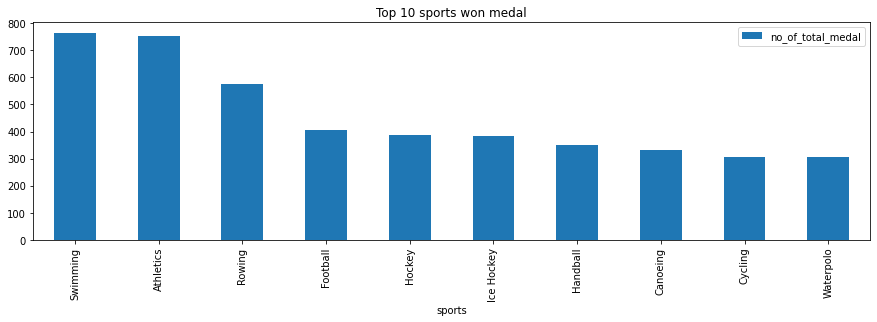

In [93]:
#sorting the above result and showing the first 20 rows
sports_total_medal.orderBy(f.desc('no_of_total_medal')).show()


# visualizing the above result using bar plot by converting the result set into panda
sports_total_medal.toPandas().sort_values(by='no_of_total_medal',ascending=False).head(10).plot(kind='bar',x='sports',y='no_of_total_medal',figsize=(15,4),title='Top 10 sports won medal')

### Find the total number of medals won by each country in swimming.

+-------------+-----------------+
|      country|total_no_of_medal|
+-------------+-----------------+
|       Russia|               20|
|       Sweden|                9|
|      Germany|               32|
|       France|               39|
|     Slovakia|                2|
|    Argentina|                1|
|Great Britain|               11|
|United States|              267|
|        China|               35|
|      Belarus|                2|
|      Croatia|                1|
|        Italy|               16|
|    Lithuania|                1|
|       Norway|                2|
|        Spain|                3|
|      Denmark|                1|
|      Ukraine|                7|
|  South Korea|                4|
|     Zimbabwe|                7|
|      Tunisia|                3|
+-------------+-----------------+
only showing top 20 rows



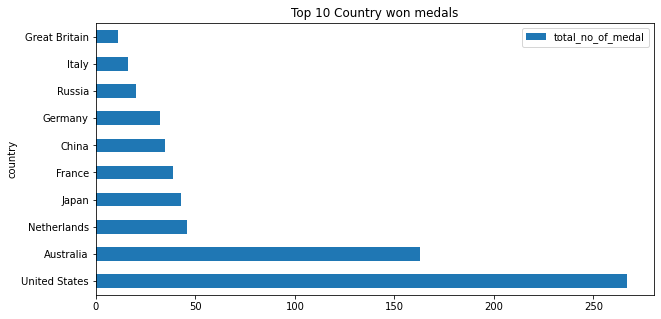

In [94]:
#filtering the sports feature with Swimming and grouping the result using country
spark_df=sparkDF.where(sparkDF['sports']=='Swimming').groupby('country').sum('total_medal').withColumnRenamed('sum(total_medal)','total_no_of_medal')
spark_df.show()# showing top 20 rows

# visualizing the above result set using barh plot by converting the result set into pandas
spark_df.toPandas().sort_values(by='total_no_of_medal',ascending=False).head(10).plot(kind='barh', x='country',y='total_no_of_medal',figsize=(10,5),title='Top 10 Country won medals')

### Find the total number of medals won by each country in Skeleton.

+-------------+-----------------+
|      country|total_no_of_medal|
+-------------+-----------------+
|       Russia|                1|
|      Germany|                2|
|Great Britain|                3|
|United States|                3|
|  Switzerland|                3|
|       Latvia|                1|
|       Canada|                4|
|      Austria|                1|
+-------------+-----------------+



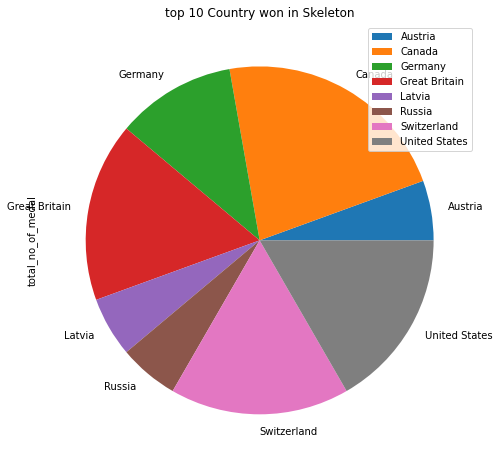

In [95]:
#filtering the sports feature with Skeleton and grouping the result using country
spark_skeleton=sparkDF.where(sparkDF['sports']=='Skeleton').groupby('country').sum('total_medal').withColumnRenamed('sum(total_medal)','total_no_of_medal')
spark_skeleton.show()# showing top 20 rows


# visualizing the above result set using pie plot by converting the result set into pandas
spark_skeleton.toPandas().groupby(['country']).sum().head(10).plot(kind='pie',y='total_no_of_medal',figsize=(12,8),title='top 10 Country won in Skeleton' )

### Find the number of medals that the US won yearly.

+----+-----------------+
|year|total_no_of_medal|
+----+-----------------+
|2012|              254|
|2010|               97|
|2006|               52|
|2004|              265|
|2002|               84|
|2008|              317|
|2000|              243|
+----+-----------------+



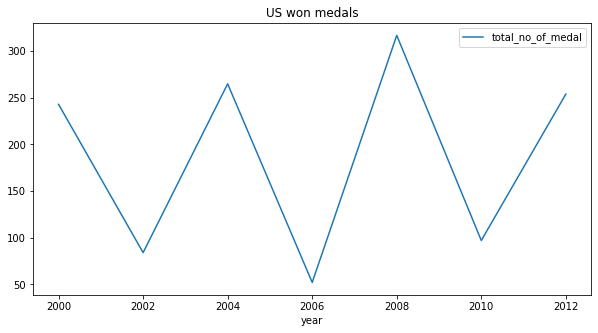

In [96]:
#filtering the country feature by United States and grouping the result using year
spark_US=sparkDF.where(sparkDF['country']=='United States').groupby('year').sum('total_medal').withColumnRenamed('sum(total_medal)','total_no_of_medal')
spark_US.show()# showing top 20 rows

# visualizing the above result set using line plot by converting the result set into pandas
spark_US.toPandas().sort_values(by='year').plot(kind='line',x='year',figsize=(10,5),title='US won medals')

+--------------+-----------------+
|       country|total_no_of_medal|
+--------------+-----------------+
|        Russia|              768|
|Chinese Taipei|               20|
|        Sweden|              181|
|     Singapore|                7|
|        Turkey|               28|
|       Germany|              629|
|   Afghanistan|                2|
|        France|              318|
|        Greece|               59|
|       Algeria|                8|
|      Slovakia|               35|
|     Argentina|              139|
|       Belgium|               18|
| Great Britain|              322|
|         Qatar|                3|
|       Finland|              118|
| United States|             1312|
|         China|              530|
|       Bahamas|               24|
|         India|               11|
+--------------+-----------------+
only showing top 20 rows



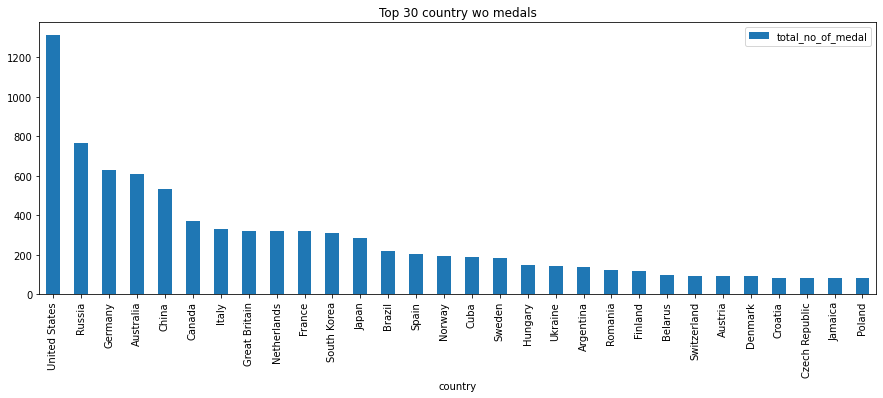

In [97]:
# Find the total number of medals won by each country. 
spark_df=sparkDF.groupby('country').sum('total_medal').withColumnRenamed('sum(total_medal)','total_no_of_medal')
spark_df.show()

spark_df.toPandas().sort_values(by='total_no_of_medal',ascending=False).head(30).plot(kind='bar',x='country',y='total_no_of_medal',figsize=(15,5),title='Top 30 country wo medals')

### Who was the oldest athlete in the olympics? Which country was he/she from?

In [99]:
# ordering the dataset using age feature in descending order and returning the top oldest athlete 
sparkDF.select('name','age','country').orderBy(f.desc('age')).show(1)

+----------+---+-------+
|      name|age|country|
+----------+---+-------+
|Ian Millar| 61| Canada|
+----------+---+-------+
only showing top 1 row

